In [1]:
import pandas as pd

In [3]:
# assign data of lists.  
data = {'No of death': [0, 1, 2, 3, 4], 'Corpse in whichh k death occured': [109, 65, 22, 3, 1]}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
  
# Print the output.  
print(df) 

   No of death  Corpse in whichh k death occured
0            0                               109
1            1                                65
2            2                                22
3            3                                 3
4            4                                 1


In [4]:
Deaths= [0, 1, 2, 3, 4]
DEATHS_OCCURRED= [109, 65, 22, 3, 1]
data_dict = {'No of Deaths': pd.Series(Deaths), 'CORPS IN WHICH K DEATHS OCCURRED':pd.Series(DEATHS_OCCURRED)}
dframe = pd.DataFrame(data_dict)
dframe

,No of Deaths,CORPS IN WHICH K DEATHS OCCURRED
0,0,109
1,1,65
2,2,22
3,3,3
4,4,1


<AxesSubplot:xlabel='No of Deaths'>

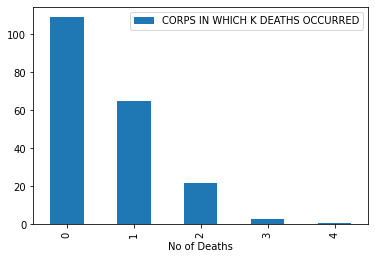

In [5]:
%matplotlib inline
dframe.plot.bar(x='No of Deaths', y='CORPS IN WHICH K DEATHS OCCURRED') 

<AxesSubplot:xlabel='No of Deaths'>

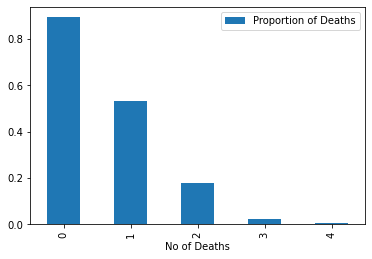

In [6]:
#Proportion of deaths = deaths due to a cause/ total deaths

m1 = 109/122
m2 = 65/122
m3 = 22/122
m4 = 3/122
m5 =1/122

dframe['Proportion of Deaths'] = [m1,m2,m3,m4,m5]


%matplotlib inline
dframe.plot.bar(x='No of Deaths', y='Proportion of Deaths')

In [10]:
#There were a total of 200 observations and 122 soldiers were killed by horse kick over that 20 years.

mean = 122/200;

print("mean:", mean)

mean: 0.61


In [8]:
#To compute probability in python

from scipy import stats
X = stats.poisson(2)    # Declare X to be a poisson random variable
print(X.pmf(3))         # P(X = 3)
print(X.rvs())          # Get a random sample from X

0.18044704431548356
4


In [9]:
#To compute poisson probability in python

#from scipy.stats import poisson

#poisson.pmf(k=5, mu=3)    #k is number of success and mu is rate value or lambda

0.10081881344492458

In [11]:
#mu = 122/200;
mu = mean;
print("Lambda value:")
print(mu)

Lambda value:
0.61


In [12]:
from scipy.stats import poisson

#mu = 0.61

#P(X=0)
x0 = poisson.pmf(k=0, mu=0.61)

#P(X=1)
x1 = poisson.pmf(k=1, mu=0.61)

#P(X=2)
x2 = poisson.pmf(k=2, mu=0.61)

#P(X=3)
x3 = poisson.pmf(k=3, mu=0.61)

#P(X=4)
x4 = poisson.pmf(k=4, mu=0.61)

dframe['Probability P(X=x)'] = [x0,x1,x2,x3,x4]
dframe

,No of Deaths,CORPS IN WHICH K DEATHS OCCURRED,Proportion of Deaths,Probability P(X=x)
0,0,109,0.893443,0.543351
1,1,65,0.532787,0.331444
2,2,22,0.180328,0.101090
3,3,3,0.024590,0.020555
4,4,1,0.008197,0.003135


In [13]:
#for predicted numbers/frequency

datapoints=200;

dp0=x0*datapoints
dp1=x1*datapoints
dp2=x2*datapoints
dp3=x3*datapoints
dp4=x4*datapoints

dframe['Predicted number of occurences'] = [dp0,dp1,dp2,dp3,dp4]
dframe

,No of Deaths,CORPS IN WHICH K DEATHS OCCURRED,Proportion of Deaths,Probability P(X=x),Predicted number of occurences
0,0,109,0.893443,0.543351,108.670174
1,1,65,0.532787,0.331444,66.288806
2,2,22,0.180328,0.101090,20.218086
3,3,3,0.024590,0.020555,4.111011
4,4,1,0.008197,0.003135,0.626929


<AxesSubplot:xlabel='No of Deaths'>

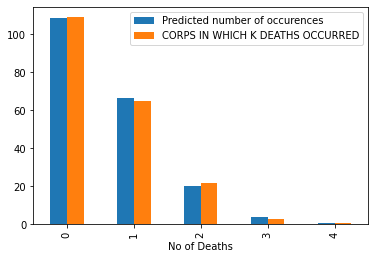

In [14]:
#Observed freq of deaths and estimated freq of deaths in a graph

%matplotlib inline
dframe.plot.bar(x='No of Deaths', y=['Predicted number of occurences','CORPS IN WHICH K DEATHS OCCURRED'])

#Plot validates the observed and calculated data thus the given data is valid for prussian horse kick

In [15]:
#chi Square test

#observed  = CORPS IN WHICH K DEATHS OCCURRED(given frequence)
#expected = Predicted number of occurences(calculated frequency)

DEATHS_CAL = [dp0,dp1,dp2,dp3,dp4]
DEATHS_OCCURRED = [109,65,22,3,1]

data_d = {'CORPS IN WHICH K DEATHS OCCURRED':pd.Series(DEATHS_OCCURRED), 'Predicted number of occurences':pd.Series(DEATHS_CAL)}
df = pd.DataFrame(data_d)
df

,CORPS IN WHICH K DEATHS OCCURRED,Predicted number of occurences
0,109,108.670174
1,65,66.288806
2,22,20.218086
3,3,4.111011
4,1,0.626929


In [29]:
#formula x**2 = summation for((observed-Expected)**2)/expected

ex0 = DEATHS_OCCURRED[0]-DEATHS_CAL[0]
ex1 = DEATHS_OCCURRED[1]-DEATHS_CAL[1]
ex2 = DEATHS_OCCURRED[2]-DEATHS_CAL[2]
ex3 = DEATHS_OCCURRED[3]-DEATHS_CAL[3]
ex4 = DEATHS_OCCURRED[4]-DEATHS_CAL[4]

exx0 = (ex0*ex0)/DEATHS_CAL[0]
exx1 = (ex1*ex1)/DEATHS_CAL[1]
exx2 = (ex2*ex2)/DEATHS_CAL[2]
exx3 = (ex3*ex3)/DEATHS_CAL[3]
exx4 = (ex4*ex4)/DEATHS_CAL[4]

cal_chi = exx0+exx1+exx2+exx3+exx4

deg_of_freedom = 5-1

#taking 5% level of significance.

tab_chi = 9.488

if cal_chi>tab_chi:
    print("Null hypothesis rejected")
    
else:
    print("Null hypothesis accepted")    #thus the given calculation validates the prussian horse kick data.

Null hypothesis accepted


In [36]:
#another way for chi square test

#from scipy.stats import chi2_contingency
#chiVal, pVal, df, exp = chi2_contingency(df)
#chiVal, pVal, df, exp

In [34]:
#exp.min()

In [35]:
#len(exp[exp<5])/len(exp)*100

In [33]:
#val = stats.chi2_contingency(df)
#val

In [32]:
#Expected_Values = val[3]

In [31]:
#no_of_rows = len(df.iloc[0:2,0])
#no_of_columns = len(df.iloc[0,0:2])
#degfree = (no_of_rows-1)*(no_of_columns-1)
#degfree
#alpha = 0.05

In [30]:
#Observed_Values = [109,65,22,3,1]

#from scipy.stats import chi2
#chi_square = sum([(o-e)**2./e for o,e in zip[Observed_Values,Expected_Values]])
#chi_square_statistic = chi_square[0]+chi_square[1]
#print("chi_square_statistic:",chi_square_statistic)
#critical_value = chi2.ppf(q = 1-alpha, ddff = degfree)
#print("critical_value:",critical_value)
#pvalue = 1-chi2.cdf(x = chi_square_statistic, ddff = degfree)
#pvalue
#alpha
#degfree
#pvalue
#if chi_square_statistic>=critical_value:
#    print("Reject H0")
#else:
#    print("Accept H0")
    
#if pvalue<=alpha:
#    print("Reject H0")
#else:
#    print("H0 accepted")